In [1]:
from expectation.seqtest.sequential_e_testing import SequentialTest, TestType
from expectation.utils.helper_functions import plot_sequential_test

import numpy as np

import matplotlib.pyplot as plt

In [2]:
test = SequentialTest(test_type="mean", null_value=0, alternative="greater")

In [3]:
result = test.update([1.2, 0.8, 1.5])

In [4]:
result

SequentialTestResult(reject_null=False, e_value=4.177261257838122, e_process=EProcess(values=[4.177261257838122], cumulative_value=4.177261257838122, total_samples=1, config=EValueConfig(significance_level=0.05, allow_infinite=False)), sample_size=3, p_value=0.23939129929295702, confidence_bounds=None, test_type=<TestType.MEAN: 'mean'>, alternative=<AlternativeType.GREATER: 'greater'>, timestamp=1731451431.0)

In [5]:
print(f"Reject null: {result.reject_null}")
print(f"E-value: {result.e_value}")
print(f"Cumulative e-value: {result.e_process.cumulative_value}")

Reject null: False
E-value: 4.177261257838122
Cumulative e-value: 4.177261257838122


Batch mean: 0.84
E-value: 1.66
Cumulative: 1.66
Reject H0: False

Batch mean: 1.14
E-value: 2.14
Cumulative: 3.55
Reject H0: False

Batch mean: 1.20
E-value: 4.71
Cumulative: 16.71
Reject H0: False

Batch mean: 0.88
E-value: 3.76
Cumulative: 62.78
Reject H0: True

Batch mean: 0.44
E-value: 1.54
Cumulative: 96.89
Reject H0: True

Batch mean: 0.48
E-value: 1.82
Cumulative: 175.88
Reject H0: True

Batch mean: 0.46
E-value: 1.71
Cumulative: 301.52
Reject H0: True



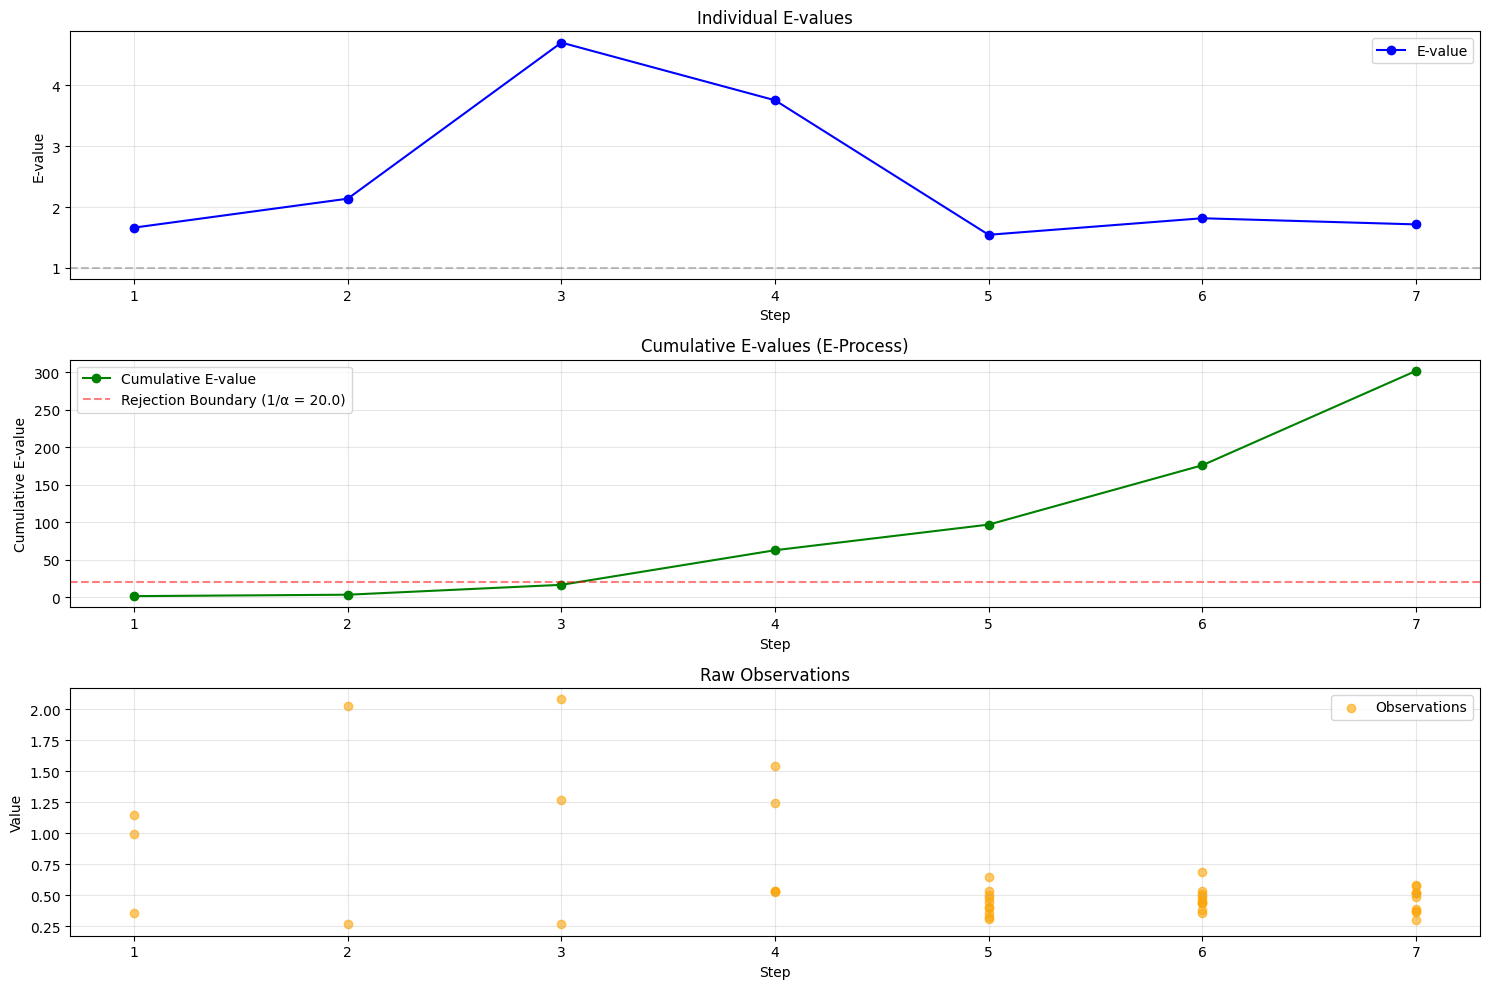

In [6]:

test = SequentialTest(
    test_type=TestType.MEAN,
    null_value=0,
    alternative="greater"
)

# Generate some data
np.random.seed(42)
data_batches = [
    np.random.normal(0.5, 1, 3),  # Batch 1
    np.random.normal(0.5, 1, 2),  # Batch 2
    np.random.normal(0.5, 1, 3),  # Batch 3
    np.random.normal(1, 1, 5),    # Batch 4
    np.random.normal(0.5, 0.1, 10),
    np.random.normal(0.5, 0.1, 10),
    np.random.normal(0.5, 0.1, 10),
]

# Run test
for batch in data_batches:
    result = test.update(batch)
    print(f"Batch mean: {np.mean(batch):.2f}")
    print(f"E-value: {result.e_value:.2f}")
    print(f"Cumulative: {result.e_process.cumulative_value:.2f}")
    print(f"Reject H0: {result.reject_null}\n")

# Plot results
history_df = test.get_history_df()
fig, axes = plot_sequential_test(history_df)
plt.show()

In [7]:
test.get_history_df()

,step,observations,eValue,cumulativeEValue,rejectNull,timestamp
0,1,"[0.9967141530112327, 0.36173569882881534, 1.14...",1.661242,1.661242,False,1.731451e+09
1,2,"[2.0230298564080256, 0.26584662527666403]",2.137588,3.551052,False,1.731451e+09
2,3,"[0.2658630430508194, 2.0792128155073915, 1.267...",4.706035,16.711375,False,1.731451e+09
3,4,"[0.5305256140650478, 1.5425600435859645, 0.536...",3.756951,62.783810,True,1.731451e+09
4,5,"[0.3086719755342202, 0.3275082167486967, 0.443...",1.543189,96.887281,True,1.731451e+09
5,6,"[0.3575251813786543, 0.44556172754748175, 0.51...",1.815293,175.878813,True,1.731451e+09
6,7,"[0.39422890710440994, 0.5822544912103189, 0.37...",1.714374,301.522071,True,1.731451e+09
